In [1]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim

import time

import numpy as np

import sys
sys.path.insert(0, './')

from models import GaussianGalaxies, sample_uniform
from vae import VAE

device = 'cuda:0'

import matplotlib.pyplot as plt
%matplotlib inline

# Create dataset

In [2]:
batch_size = 64
n_images = batch_size * 1

slen = 51

dataset = GaussianGalaxies(n_images = n_images, 
                           slen = slen)
data_loader = DataLoader(dataset, batch_size=batch_size)

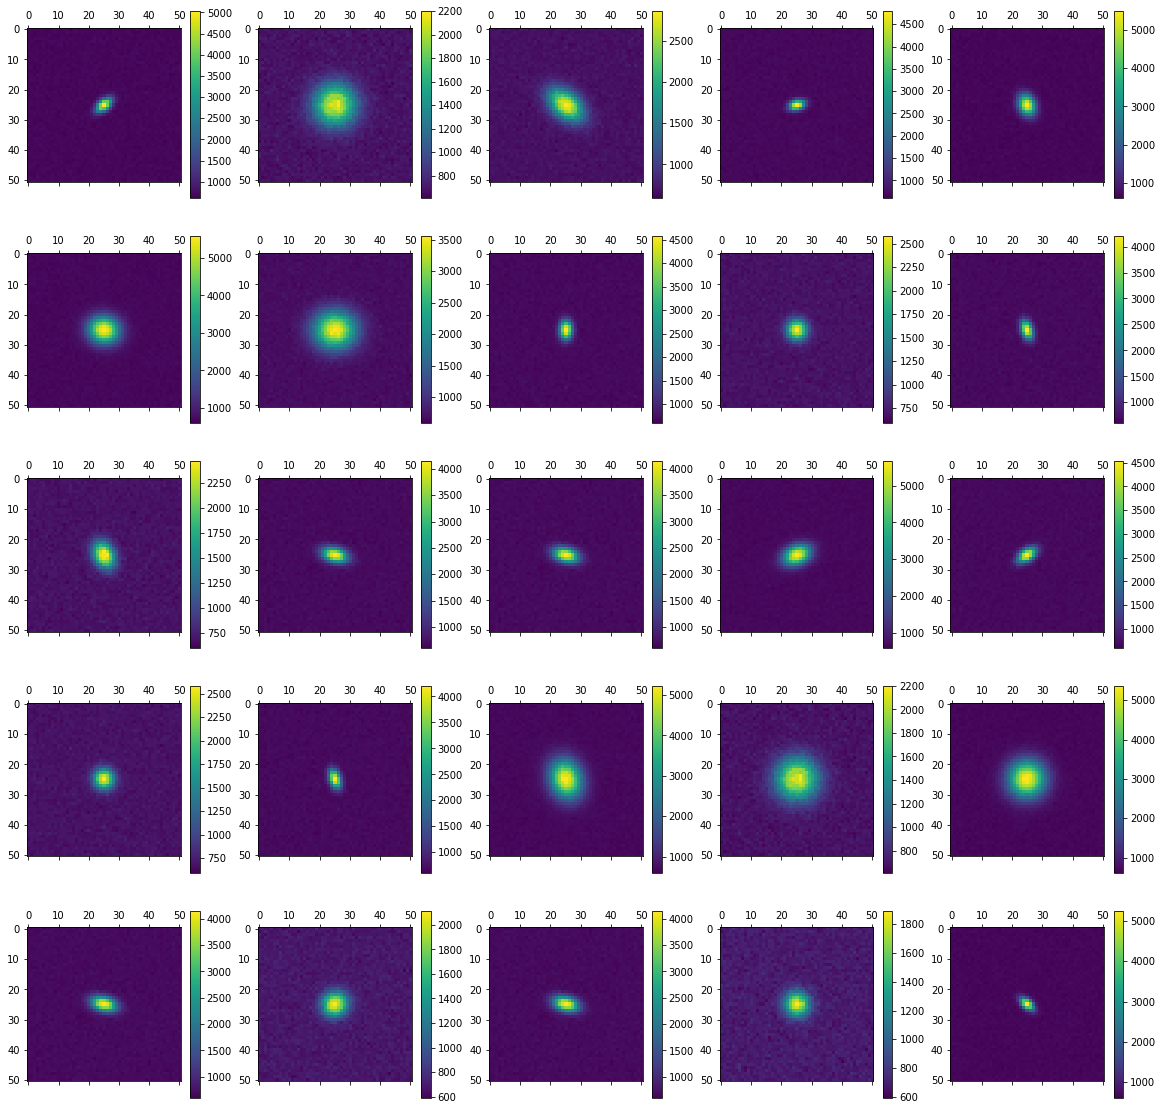

In [3]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(25): 
    
    indx = np.random.choice(n_images)
    
    x0 = i // 5
    x1 = i % 5
    
    image = dataset[indx]
    
    im = ax[x0, x1].matshow(image.cpu())
    
    fig.colorbar(im, ax = ax[x0, x1])

# Define VAE

In [4]:
galaxy_vae = VAE(slen = slen)
galaxy_vae.to(device)

VAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=2601, out_features=528, bias=True)
    (fc2): Linear(in_features=528, out_features=528, bias=True)
    (fc3): Linear(in_features=528, out_features=16, bias=True)
    (tanh): Tanh()
  )
  (decoder): MLPDecoder(
    (fc1): Linear(in_features=8, out_features=528, bias=True)
    (fc2): Linear(in_features=528, out_features=528, bias=True)
    (fc3): Linear(in_features=528, out_features=2601, bias=True)
    (tanh): Tanh()
  )
)

# Train 

In [5]:
optimizer = optim.Adam(galaxy_vae.parameters())

In [6]:
n_epochs = 10000

In [7]:
t0 = time.time() 

for epoch in range(n_epochs): 
    
    avg_loss = 0.
    
    for _, images in enumerate(data_loader):
        loss = galaxy_vae.get_loss(images).mean()
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        avg_loss += loss 
        
    print('epoch [{}]. loss = {}'.format(epoch, avg_loss / len(data_loader)))

print('done. Elapsed {:.03f}sec'.format(time.time() - t0))

epoch [0]. loss = 247495.71875
epoch [1]. loss = 247360.34375
epoch [2]. loss = 247101.546875
epoch [3]. loss = 246803.5
epoch [4]. loss = 246474.21875
epoch [5]. loss = 246144.140625
epoch [6]. loss = 245820.125
epoch [7]. loss = 245499.015625
epoch [8]. loss = 245179.03125
epoch [9]. loss = 244858.265625
epoch [10]. loss = 244535.78125
epoch [11]. loss = 244213.421875
epoch [12]. loss = 243890.5625
epoch [13]. loss = 243568.890625
epoch [14]. loss = 243245.390625
epoch [15]. loss = 242927.421875
epoch [16]. loss = 242605.046875
epoch [17]. loss = 242283.390625
epoch [18]. loss = 241963.65625
epoch [19]. loss = 241643.46875
epoch [20]. loss = 241324.640625
epoch [21]. loss = 241006.3125
epoch [22]. loss = 240688.140625
epoch [23]. loss = 240371.234375
epoch [24]. loss = 240055.84375
epoch [25]. loss = 239739.234375
epoch [26]. loss = 239425.65625
epoch [27]. loss = 239110.75
epoch [28]. loss = 238799.6875
epoch [29]. loss = 238487.484375
epoch [30]. loss = 238176.9375
epoch [31]. loss

epoch [255]. loss = 187650.75
epoch [256]. loss = 187482.109375
epoch [257]. loss = 187313.40625
epoch [258]. loss = 187145.21875
epoch [259]. loss = 186977.28125
epoch [260]. loss = 186810.234375
epoch [261]. loss = 186651.90625
epoch [262]. loss = 186478.546875
epoch [263]. loss = 186315.40625
epoch [264]. loss = 186152.453125
epoch [265]. loss = 185989.375
epoch [266]. loss = 185825.8125
epoch [267]. loss = 185662.078125
epoch [268]. loss = 185498.09375
epoch [269]. loss = 185333.9375
epoch [270]. loss = 185169.625
epoch [271]. loss = 185005.3125
epoch [272]. loss = 184841.1875
epoch [273]. loss = 184677.3125
epoch [274]. loss = 184513.8125
epoch [275]. loss = 184351.609375
epoch [276]. loss = 184188.375
epoch [277]. loss = 184027.390625
epoch [278]. loss = 183867.75
epoch [279]. loss = 183704.8125
epoch [280]. loss = 183544.71875
epoch [281]. loss = 183385.0
epoch [282]. loss = 183225.5625
epoch [283]. loss = 183066.0625
epoch [284]. loss = 182907.59375
epoch [285]. loss = 182748.0

epoch [516]. loss = 152954.484375
epoch [517]. loss = 152849.53125
epoch [518]. loss = 152744.78125
epoch [519]. loss = 152640.1875
epoch [520]. loss = 152535.34375
epoch [521]. loss = 152430.765625
epoch [522]. loss = 152326.3125
epoch [523]. loss = 152222.03125
epoch [524]. loss = 152118.09375
epoch [525]. loss = 152013.90625
epoch [526]. loss = 151914.5625
epoch [527]. loss = 151806.96875
epoch [528]. loss = 151704.171875
epoch [529]. loss = 151601.5
epoch [530]. loss = 151498.84375
epoch [531]. loss = 151396.25
epoch [532]. loss = 151293.671875
epoch [533]. loss = 151191.15625
epoch [534]. loss = 151088.6875
epoch [535]. loss = 150986.28125
epoch [536]. loss = 150884.03125
epoch [537]. loss = 150781.84375
epoch [538]. loss = 150679.84375
epoch [539]. loss = 150577.984375
epoch [540]. loss = 150476.28125
epoch [541]. loss = 150374.90625
epoch [542]. loss = 150273.25
epoch [543]. loss = 150172.40625
epoch [544]. loss = 150071.21875
epoch [545]. loss = 149970.84375
epoch [546]. loss =

epoch [776]. loss = 130227.578125
epoch [777]. loss = 130154.7421875
epoch [778]. loss = 130081.9296875
epoch [779]. loss = 130009.171875
epoch [780]. loss = 129936.5078125
epoch [781]. loss = 129864.09375
epoch [782]. loss = 129791.453125
epoch [783]. loss = 129719.234375
epoch [784]. loss = 129646.9765625
epoch [785]. loss = 129575.109375
epoch [786]. loss = 129502.6484375
epoch [787]. loss = 129430.859375
epoch [788]. loss = 129359.0
epoch [789]. loss = 129287.1484375
epoch [790]. loss = 129215.53125
epoch [791]. loss = 129144.0703125
epoch [792]. loss = 129074.2734375
epoch [793]. loss = 129001.53125
epoch [794]. loss = 128930.1015625
epoch [795]. loss = 128859.09375
epoch [796]. loss = 128788.0625
epoch [797]. loss = 128717.0703125
epoch [798]. loss = 128646.2578125
epoch [799]. loss = 128575.5
epoch [800]. loss = 128504.71875
epoch [801]. loss = 128434.0
epoch [802]. loss = 128363.3046875
epoch [803]. loss = 128292.6328125
epoch [804]. loss = 128222.2734375
epoch [805]. loss = 12

epoch [1034]. loss = 114117.5625
epoch [1035]. loss = 114063.734375
epoch [1036]. loss = 114009.9453125
epoch [1037]. loss = 113956.21875
epoch [1038]. loss = 113902.546875
epoch [1039]. loss = 113848.90625
epoch [1040]. loss = 113795.40625
epoch [1041]. loss = 113741.828125
epoch [1042]. loss = 113688.3828125
epoch [1043]. loss = 113635.03125
epoch [1044]. loss = 113581.6484375
epoch [1045]. loss = 113528.3046875
epoch [1046]. loss = 113475.125
epoch [1047]. loss = 113421.9296875
epoch [1048]. loss = 113368.8203125
epoch [1049]. loss = 113315.75
epoch [1050]. loss = 113262.78125
epoch [1051]. loss = 113210.734375
epoch [1052]. loss = 113157.0703125
epoch [1053]. loss = 113104.453125
epoch [1054]. loss = 113051.4375
epoch [1055]. loss = 112998.875
epoch [1056]. loss = 112946.4296875
epoch [1057]. loss = 112893.8359375
epoch [1058]. loss = 112841.2734375
epoch [1059]. loss = 112788.984375
epoch [1060]. loss = 112736.484375
epoch [1061]. loss = 112684.40625
epoch [1062]. loss = 112631.84

epoch [1290]. loss = 102054.40625
epoch [1291]. loss = 102013.265625
epoch [1292]. loss = 101971.859375
epoch [1293]. loss = 101930.609375
epoch [1294]. loss = 101889.5078125
epoch [1295]. loss = 101848.3125
epoch [1296]. loss = 101807.140625
epoch [1297]. loss = 101766.328125
epoch [1298]. loss = 101725.28125
epoch [1299]. loss = 101684.0625
epoch [1300]. loss = 101727.71875
epoch [1301]. loss = 101613.0
epoch [1302]. loss = 101590.5546875
epoch [1303]. loss = 101575.375
epoch [1304]. loss = 101561.7421875
epoch [1305]. loss = 101536.234375
epoch [1306]. loss = 101506.671875
epoch [1307]. loss = 101478.8515625
epoch [1308]. loss = 101451.609375
epoch [1309]. loss = 101423.4609375
epoch [1310]. loss = 101393.625
epoch [1311]. loss = 101361.78125
epoch [1312]. loss = 101327.828125
epoch [1313]. loss = 101291.7734375
epoch [1314]. loss = 101254.140625
epoch [1315]. loss = 101215.4296875
epoch [1316]. loss = 101175.6796875
epoch [1317]. loss = 101134.9609375
epoch [1318]. loss = 101093.40

epoch [1544]. loss = 92729.125
epoch [1545]. loss = 92696.2109375
epoch [1546]. loss = 92663.3125
epoch [1547]. loss = 92630.96875
epoch [1548]. loss = 92597.6640625
epoch [1549]. loss = 92564.8984375
epoch [1550]. loss = 92532.125
epoch [1551]. loss = 92499.71875
epoch [1552]. loss = 92466.8203125
epoch [1553]. loss = 92434.1640625
epoch [1554]. loss = 92401.4375
epoch [1555]. loss = 92368.9765625
epoch [1556]. loss = 92336.328125
epoch [1557]. loss = 92303.859375
epoch [1558]. loss = 92271.3515625
epoch [1559]. loss = 92241.453125
epoch [1560]. loss = 92207.671875
epoch [1561]. loss = 92174.2890625
epoch [1562]. loss = 92142.109375
epoch [1563]. loss = 92109.9765625
epoch [1564]. loss = 92077.84375
epoch [1565]. loss = 92045.703125
epoch [1566]. loss = 92013.5625
epoch [1567]. loss = 91981.4140625
epoch [1568]. loss = 91949.265625
epoch [1569]. loss = 91917.125
epoch [1570]. loss = 91884.984375
epoch [1571]. loss = 91852.859375
epoch [1572]. loss = 91820.75
epoch [1573]. loss = 91788

epoch [1797]. loss = 85261.59375
epoch [1798]. loss = 85234.828125
epoch [1799]. loss = 85208.234375
epoch [1800]. loss = 85181.53125
epoch [1801]. loss = 85154.9375
epoch [1802]. loss = 85128.4453125
epoch [1803]. loss = 85101.890625
epoch [1804]. loss = 85075.21875
epoch [1805]. loss = 85048.9296875
epoch [1806]. loss = 85022.0
epoch [1807]. loss = 84995.390625
epoch [1808]. loss = 84969.0078125
epoch [1809]. loss = 84942.484375
epoch [1810]. loss = 84916.5078125
epoch [1811]. loss = 84889.8359375
epoch [1812]. loss = 84863.390625
epoch [1813]. loss = 84837.046875
epoch [1814]. loss = 84810.703125
epoch [1815]. loss = 84784.453125
epoch [1816]. loss = 84758.1328125
epoch [1817]. loss = 84731.828125
epoch [1818]. loss = 84705.578125
epoch [1819]. loss = 84680.703125
epoch [1820]. loss = 84653.21875
epoch [1821]. loss = 84626.703125
epoch [1822]. loss = 84600.7890625
epoch [1823]. loss = 84575.7109375
epoch [1824]. loss = 84548.6171875
epoch [1825]. loss = 84517.546875
epoch [1826]. lo

epoch [2052]. loss = 79103.7890625
epoch [2053]. loss = 79081.859375
epoch [2054]. loss = 79059.921875
epoch [2055]. loss = 79037.9921875
epoch [2056]. loss = 79016.046875
epoch [2057]. loss = 78994.0625
epoch [2058]. loss = 78972.078125
epoch [2059]. loss = 78950.09375
epoch [2060]. loss = 78928.109375
epoch [2061]. loss = 78906.0859375
epoch [2062]. loss = 78884.1015625
epoch [2063]. loss = 78862.140625
epoch [2064]. loss = 78840.1171875
epoch [2065]. loss = 78818.140625
epoch [2066]. loss = 78796.234375
epoch [2067]. loss = 78774.3125
epoch [2068]. loss = 78752.4609375
epoch [2069]. loss = 78730.7265625
epoch [2070]. loss = 78708.7265625
epoch [2071]. loss = 78686.9375
epoch [2072]. loss = 78665.171875
epoch [2073]. loss = 78643.515625
epoch [2074]. loss = 78622.4921875
epoch [2075]. loss = 78600.078125
epoch [2076]. loss = 78585.4296875
epoch [2077]. loss = 78557.09375
epoch [2078]. loss = 78535.8046875
epoch [2079]. loss = 78514.53125
epoch [2080]. loss = 78493.265625
epoch [2081]

epoch [2305]. loss = 74014.6484375
epoch [2306]. loss = 73996.5390625
epoch [2307]. loss = 73978.3828125
epoch [2308]. loss = 73960.171875
epoch [2309]. loss = 73941.9375
epoch [2310]. loss = 73923.65625
epoch [2311]. loss = 73905.3515625
epoch [2312]. loss = 73887.03125
epoch [2313]. loss = 73868.6875
epoch [2314]. loss = 73850.34375
epoch [2315]. loss = 73831.984375
epoch [2316]. loss = 73813.640625
epoch [2317]. loss = 73795.296875
epoch [2318]. loss = 73776.96875
epoch [2319]. loss = 73758.640625
epoch [2320]. loss = 73740.328125
epoch [2321]. loss = 73722.03125
epoch [2322]. loss = 73703.75
epoch [2323]. loss = 73685.484375
epoch [2324]. loss = 73667.21875
epoch [2325]. loss = 73648.9765625
epoch [2326]. loss = 73630.75
epoch [2327]. loss = 73612.53125
epoch [2328]. loss = 73594.3125
epoch [2329]. loss = 73576.125
epoch [2330]. loss = 73557.9375
epoch [2331]. loss = 73539.7578125
epoch [2332]. loss = 73521.59375
epoch [2333]. loss = 73503.4375
epoch [2334]. loss = 73485.2890625
ep

epoch [2561]. loss = 69691.0
epoch [2562]. loss = 69675.4296875
epoch [2563]. loss = 69659.8671875
epoch [2564]. loss = 69644.3203125
epoch [2565]. loss = 69628.7890625
epoch [2566]. loss = 69613.2578125
epoch [2567]. loss = 69597.734375
epoch [2568]. loss = 69582.21875
epoch [2569]. loss = 69566.7109375
epoch [2570]. loss = 69551.203125
epoch [2571]. loss = 69535.6953125
epoch [2572]. loss = 69520.2109375
epoch [2573]. loss = 69504.71875
epoch [2574]. loss = 69489.2421875
epoch [2575]. loss = 69473.78125
epoch [2576]. loss = 69458.3359375
epoch [2577]. loss = 69442.90625
epoch [2578]. loss = 69427.484375
epoch [2579]. loss = 69412.078125
epoch [2580]. loss = 69396.6875
epoch [2581]. loss = 69381.3203125
epoch [2582]. loss = 69365.953125
epoch [2583]. loss = 69350.609375
epoch [2584]. loss = 69335.265625
epoch [2585]. loss = 69319.9375
epoch [2586]. loss = 69304.625
epoch [2587]. loss = 69289.328125
epoch [2588]. loss = 69274.046875
epoch [2589]. loss = 69258.75
epoch [2590]. loss = 69

epoch [2818]. loss = 66051.1875
epoch [2819]. loss = 66037.6796875
epoch [2820]. loss = 66024.1796875
epoch [2821]. loss = 66010.6953125
epoch [2822]. loss = 65997.234375
epoch [2823]. loss = 65983.7734375
epoch [2824]. loss = 65970.34375
epoch [2825]. loss = 65956.90625
epoch [2826]. loss = 65943.5
epoch [2827]. loss = 65930.09375
epoch [2828]. loss = 65916.71875
epoch [2829]. loss = 65903.34375
epoch [2830]. loss = 65889.9921875
epoch [2831]. loss = 65876.6484375
epoch [2832]. loss = 65863.3203125
epoch [2833]. loss = 65850.0
epoch [2834]. loss = 65836.6875
epoch [2835]. loss = 65823.40625
epoch [2836]. loss = 65810.1171875
epoch [2837]. loss = 65796.8515625
epoch [2838]. loss = 65783.59375
epoch [2839]. loss = 65770.34375
epoch [2840]. loss = 65757.109375
epoch [2841]. loss = 65743.8828125
epoch [2842]. loss = 65730.671875
epoch [2843]. loss = 65717.46875
epoch [2844]. loss = 65704.28125
epoch [2845]. loss = 65691.09375
epoch [2846]. loss = 65677.9296875
epoch [2847]. loss = 65664.7

epoch [3078]. loss = 62846.41796875
epoch [3079]. loss = 62835.1484375
epoch [3080]. loss = 62823.83203125
epoch [3081]. loss = 62812.5390625
epoch [3082]. loss = 62801.30078125
epoch [3083]. loss = 62790.03515625
epoch [3084]. loss = 62778.77734375
epoch [3085]. loss = 62767.53515625
epoch [3086]. loss = 62756.265625
epoch [3087]. loss = 62745.02734375
epoch [3088]. loss = 62733.859375
epoch [3089]. loss = 62722.5625
epoch [3090]. loss = 62711.3828125
epoch [3091]. loss = 62700.1640625
epoch [3092]. loss = 62688.9765625
epoch [3093]. loss = 62677.7578125
epoch [3094]. loss = 62666.5703125
epoch [3095]. loss = 62655.37109375
epoch [3096]. loss = 62645.984375
epoch [3097]. loss = 62633.0859375
epoch [3098]. loss = 62621.875
epoch [3099]. loss = 62610.7890625
epoch [3100]. loss = 62599.6796875
epoch [3101]. loss = 62588.63671875
epoch [3102]. loss = 62577.46484375
epoch [3103]. loss = 62566.3671875
epoch [3104]. loss = 62555.24609375
epoch [3105]. loss = 62544.1328125
epoch [3106]. loss 

epoch [3337]. loss = 60131.5
epoch [3338]. loss = 60121.75390625
epoch [3339]. loss = 60112.046875
epoch [3340]. loss = 60102.3828125
epoch [3341]. loss = 60092.70703125
epoch [3342]. loss = 60082.96875
epoch [3343]. loss = 60073.28125
epoch [3344]. loss = 60063.546875
epoch [3345]. loss = 60053.8828125
epoch [3346]. loss = 60044.2109375
epoch [3347]. loss = 60034.56640625
epoch [3348]. loss = 60024.8984375
epoch [3349]. loss = 60015.24609375
epoch [3350]. loss = 60005.62109375
epoch [3351]. loss = 59995.95703125
epoch [3352]. loss = 59986.3125
epoch [3353]. loss = 59976.6796875
epoch [3354]. loss = 59967.03515625
epoch [3355]. loss = 59957.4140625
epoch [3356]. loss = 59947.8046875
epoch [3357]. loss = 59938.21875
epoch [3358]. loss = 59928.58984375
epoch [3359]. loss = 59919.0
epoch [3360]. loss = 59909.40625
epoch [3361]. loss = 59899.80859375
epoch [3362]. loss = 59890.1796875
epoch [3363]. loss = 59880.6328125
epoch [3364]. loss = 59871.0625
epoch [3365]. loss = 59861.51953125
epo

epoch [3595]. loss = 57828.55078125
epoch [3596]. loss = 57819.984375
epoch [3597]. loss = 57811.42578125
epoch [3598]. loss = 57802.87890625
epoch [3599]. loss = 57794.34375
epoch [3600]. loss = 57785.80859375
epoch [3601]. loss = 57777.28125
epoch [3602]. loss = 57768.7734375
epoch [3603]. loss = 57760.26171875
epoch [3604]. loss = 57751.76171875
epoch [3605]. loss = 57743.26953125
epoch [3606]. loss = 57734.78125
epoch [3607]. loss = 57726.30859375
epoch [3608]. loss = 57717.8359375
epoch [3609]. loss = 57709.375
epoch [3610]. loss = 57700.921875
epoch [3611]. loss = 57692.4765625
epoch [3612]. loss = 57684.03515625
epoch [3613]. loss = 57675.6015625
epoch [3614]. loss = 57667.1796875
epoch [3615]. loss = 57658.765625
epoch [3616]. loss = 57650.3515625
epoch [3617]. loss = 57641.953125
epoch [3618]. loss = 57633.56640625
epoch [3619]. loss = 57625.1796875
epoch [3620]. loss = 57616.8046875
epoch [3621]. loss = 57608.44140625
epoch [3622]. loss = 57600.08203125
epoch [3623]. loss = 5

epoch [3853]. loss = 55800.07421875
epoch [3854]. loss = 55792.80078125
epoch [3855]. loss = 55785.5078125
epoch [3856]. loss = 55778.22265625
epoch [3857]. loss = 55771.31640625
epoch [3858]. loss = 55763.6484375
epoch [3859]. loss = 55756.328125
epoch [3860]. loss = 55749.0703125
epoch [3861]. loss = 55741.796875
epoch [3862]. loss = 55734.4609375
epoch [3863]. loss = 55727.265625
epoch [3864]. loss = 55720.0078125
epoch [3865]. loss = 55712.68359375
epoch [3866]. loss = 55705.78125
epoch [3867]. loss = 55698.23828125
epoch [3868]. loss = 55690.984375
epoch [3869]. loss = 55683.734375
epoch [3870]. loss = 55676.52734375
epoch [3871]. loss = 55669.44140625
epoch [3872]. loss = 55662.0390625
epoch [3873]. loss = 55654.8046875
epoch [3874]. loss = 55647.5859375
epoch [3875]. loss = 55640.3984375
epoch [3876]. loss = 55633.15625
epoch [3877]. loss = 55625.9375
epoch [3878]. loss = 55618.7265625
epoch [3879]. loss = 55611.66015625
epoch [3880]. loss = 55604.32421875
epoch [3881]. loss = 5

epoch [4115]. loss = 54027.9765625
epoch [4116]. loss = 54013.30078125
epoch [4117]. loss = 54008.2109375
epoch [4118]. loss = 54003.1953125
epoch [4119]. loss = 53998.09375
epoch [4120]. loss = 53992.8359375
epoch [4121]. loss = 53987.390625
epoch [4122]. loss = 53981.73046875
epoch [4123]. loss = 53975.875
epoch [4124]. loss = 53969.84375
epoch [4125]. loss = 53963.65234375
epoch [4126]. loss = 53957.3515625
epoch [4127]. loss = 53950.953125
epoch [4128]. loss = 53944.5078125
epoch [4129]. loss = 53938.03125
epoch [4130]. loss = 53931.5390625
epoch [4131]. loss = 53925.0390625
epoch [4132]. loss = 53918.5546875
epoch [4133]. loss = 53912.0703125
epoch [4134]. loss = 53905.6015625
epoch [4135]. loss = 53899.1640625
epoch [4136]. loss = 53892.765625
epoch [4137]. loss = 53886.4375
epoch [4138]. loss = 53880.21875
epoch [4139]. loss = 53874.0859375
epoch [4140]. loss = 53867.96875
epoch [4141]. loss = 53861.7265625
epoch [4142]. loss = 53855.3203125
epoch [4143]. loss = 53848.8359375
ep

epoch [4371]. loss = 52509.234375
epoch [4372]. loss = 52503.734375
epoch [4373]. loss = 52498.2265625
epoch [4374]. loss = 52492.76171875
epoch [4375]. loss = 52487.2578125
epoch [4376]. loss = 52481.84375
epoch [4377]. loss = 52476.32421875
epoch [4378]. loss = 52470.82421875
epoch [4379]. loss = 52465.34375
epoch [4380]. loss = 52459.8671875
epoch [4381]. loss = 52454.3984375
epoch [4382]. loss = 52455.03515625
epoch [4383]. loss = 52444.12109375
epoch [4384]. loss = 52439.68359375
epoch [4385]. loss = 52435.26953125
epoch [4386]. loss = 52430.76953125
epoch [4387]. loss = 52426.12890625
epoch [4388]. loss = 52421.31640625
epoch [4389]. loss = 52416.3203125
epoch [4390]. loss = 52411.14453125
epoch [4391]. loss = 52405.8125
epoch [4392]. loss = 52400.359375
epoch [4393]. loss = 52394.80078125
epoch [4394]. loss = 52389.1875
epoch [4395]. loss = 52383.5390625
epoch [4396]. loss = 52377.87890625
epoch [4397]. loss = 52372.21875
epoch [4398]. loss = 52366.5703125
epoch [4399]. loss = 5

epoch [4631]. loss = 51186.38671875
epoch [4632]. loss = 51181.546875
epoch [4633]. loss = 51176.7109375
epoch [4634]. loss = 51171.8828125
epoch [4635]. loss = 51167.0546875
epoch [4636]. loss = 51162.2265625
epoch [4637]. loss = 51157.3984375
epoch [4638]. loss = 51152.58203125
epoch [4639]. loss = 51147.76171875
epoch [4640]. loss = 51142.94140625
epoch [4641]. loss = 51138.1328125
epoch [4642]. loss = 51133.3203125
epoch [4643]. loss = 51128.5078125
epoch [4644]. loss = 51123.703125
epoch [4645]. loss = 51118.90234375
epoch [4646]. loss = 51114.1015625
epoch [4647]. loss = 51109.30078125
epoch [4648]. loss = 51104.5078125
epoch [4649]. loss = 51099.71484375
epoch [4650]. loss = 51094.92578125
epoch [4651]. loss = 51090.1328125
epoch [4652]. loss = 51085.3515625
epoch [4653]. loss = 51080.56640625
epoch [4654]. loss = 51075.78515625
epoch [4655]. loss = 51071.0078125
epoch [4656]. loss = 51066.234375
epoch [4657]. loss = 51061.4609375
epoch [4658]. loss = 51056.6875
epoch [4659]. lo

epoch [4889]. loss = 50030.42578125
epoch [4890]. loss = 50026.2578125
epoch [4891]. loss = 50021.76171875
epoch [4892]. loss = 50017.9453125
epoch [4893]. loss = 50013.75
epoch [4894]. loss = 50009.625
epoch [4895]. loss = 50004.84375
epoch [4896]. loss = 50001.34375
epoch [4897]. loss = 49997.125
epoch [4898]. loss = 49993.01953125
epoch [4899]. loss = 49988.7109375
epoch [4900]. loss = 49736.90625
epoch [4901]. loss = 104433960.0
epoch [4902]. loss = 101463.671875
epoch [4903]. loss = 7161556.0
epoch [4904]. loss = 24996100.0
epoch [4905]. loss = 35375020.0
epoch [4906]. loss = 22301026.0
epoch [4907]. loss = 64633428.0
epoch [4908]. loss = 4568023.0
epoch [4909]. loss = 1784744.375
epoch [4910]. loss = 786353.3125
epoch [4911]. loss = 417494.46875
epoch [4912]. loss = 2494074.5
epoch [4913]. loss = 313940.34375
epoch [4914]. loss = 235923.21875
epoch [4915]. loss = 157355.78125
epoch [4916]. loss = 193576.609375
epoch [4917]. loss = 140385.28125
epoch [4918]. loss = 162133.140625
e

epoch [5150]. loss = 51380.9921875
epoch [5151]. loss = 51241.7734375
epoch [5152]. loss = 51177.859375
epoch [5153]. loss = 51201.5234375
epoch [5154]. loss = 51146.83984375
epoch [5155]. loss = 51190.25
epoch [5156]. loss = 51174.26171875
epoch [5157]. loss = 51128.953125
epoch [5158]. loss = 51185.28125
epoch [5159]. loss = 51088.5703125
epoch [5160]. loss = 51486.75390625
epoch [5161]. loss = 51205.98046875
epoch [5162]. loss = 51382.640625
epoch [5163]. loss = 51364.40234375
epoch [5164]. loss = 51165.3203125
epoch [5165]. loss = 51266.53125
epoch [5166]. loss = 51149.6796875
epoch [5167]. loss = 51541.9921875
epoch [5168]. loss = 51046.53125
epoch [5169]. loss = 51465.7578125
epoch [5170]. loss = 51351.8046875
epoch [5171]. loss = 51329.3359375
epoch [5172]. loss = 51273.3828125
epoch [5173]. loss = 51243.28515625
epoch [5174]. loss = 51366.2265625
epoch [5175]. loss = 51201.5625
epoch [5176]. loss = 51310.73828125
epoch [5177]. loss = 51116.1640625
epoch [5178]. loss = 51162.894

epoch [5412]. loss = 51191.453125
epoch [5413]. loss = 51210.5859375
epoch [5414]. loss = 51278.875
epoch [5415]. loss = 51136.3828125
epoch [5416]. loss = 50997.8984375
epoch [5417]. loss = 51200.3828125
epoch [5418]. loss = 51115.5
epoch [5419]. loss = 51176.7734375
epoch [5420]. loss = 51108.22265625
epoch [5421]. loss = 51108.6953125
epoch [5422]. loss = 51247.234375
epoch [5423]. loss = 51099.03125
epoch [5424]. loss = 51126.984375
epoch [5425]. loss = 51148.9765625
epoch [5426]. loss = 51152.53125
epoch [5427]. loss = 51127.5859375
epoch [5428]. loss = 51120.0390625
epoch [5429]. loss = 51114.875
epoch [5430]. loss = 51089.1328125
epoch [5431]. loss = 51113.44921875
epoch [5432]. loss = 51115.0390625
epoch [5433]. loss = 51117.6875
epoch [5434]. loss = 51121.75390625
epoch [5435]. loss = 51100.015625
epoch [5436]. loss = 51164.125
epoch [5437]. loss = 51122.27734375
epoch [5438]. loss = 51127.109375
epoch [5439]. loss = 51146.1015625
epoch [5440]. loss = 51126.890625
epoch [5441]

epoch [5672]. loss = 51077.4140625
epoch [5673]. loss = 51083.71875
epoch [5674]. loss = 51095.95703125
epoch [5675]. loss = 51126.55078125
epoch [5676]. loss = 51145.4609375
epoch [5677]. loss = 51087.02734375
epoch [5678]. loss = 51059.5
epoch [5679]. loss = 51088.0078125
epoch [5680]. loss = 51090.0
epoch [5681]. loss = 51086.28125
epoch [5682]. loss = 51095.8671875
epoch [5683]. loss = 51105.13671875
epoch [5684]. loss = 51098.6015625
epoch [5685]. loss = 51093.328125
epoch [5686]. loss = 51061.01171875
epoch [5687]. loss = 51109.078125
epoch [5688]. loss = 51096.98046875
epoch [5689]. loss = 51144.24609375
epoch [5690]. loss = 51092.0078125
epoch [5691]. loss = 51069.12109375
epoch [5692]. loss = 51040.734375
epoch [5693]. loss = 51087.828125
epoch [5694]. loss = 51083.5078125
epoch [5695]. loss = 51353.2734375
epoch [5696]. loss = 51089.6328125
epoch [5697]. loss = 51063.875
epoch [5698]. loss = 51083.8984375
epoch [5699]. loss = 51441.984375
epoch [5700]. loss = 51050.84375
epoc

epoch [5931]. loss = 51138.6171875
epoch [5932]. loss = 51112.6171875
epoch [5933]. loss = 51098.1875
epoch [5934]. loss = 51060.421875
epoch [5935]. loss = 51055.1875
epoch [5936]. loss = 51060.2421875
epoch [5937]. loss = 51051.4140625
epoch [5938]. loss = 51052.91015625
epoch [5939]. loss = 51049.265625
epoch [5940]. loss = 51054.8125
epoch [5941]. loss = 51032.1796875
epoch [5942]. loss = 51031.65625
epoch [5943]. loss = 51053.1484375
epoch [5944]. loss = 51051.25390625
epoch [5945]. loss = 51046.03515625
epoch [5946]. loss = 51045.625
epoch [5947]. loss = 51046.671875
epoch [5948]. loss = 51048.8125
epoch [5949]. loss = 51049.33984375
epoch [5950]. loss = 51050.1796875
epoch [5951]. loss = 51030.71484375
epoch [5952]. loss = 51043.640625
epoch [5953]. loss = 53917.7890625
epoch [5954]. loss = 51045.88671875
epoch [5955]. loss = 51050.92578125
epoch [5956]. loss = 51070.3359375
epoch [5957]. loss = 51047.046875
epoch [5958]. loss = 51017.1640625
epoch [5959]. loss = 51034.8671875
e

epoch [6174]. loss = 51046.875
epoch [6175]. loss = 51016.80078125
epoch [6176]. loss = 51020.859375
epoch [6177]. loss = 51014.21484375
epoch [6178]. loss = 51068.5234375
epoch [6179]. loss = 51014.6015625
epoch [6180]. loss = 51000.828125
epoch [6181]. loss = 51015.1640625
epoch [6182]. loss = 51009.9765625
epoch [6183]. loss = 51017.5
epoch [6184]. loss = 51041.984375
epoch [6185]. loss = 51017.68359375
epoch [6186]. loss = 51015.46875
epoch [6187]. loss = 51016.22265625
epoch [6188]. loss = 51019.09375
epoch [6189]. loss = 51024.59375
epoch [6190]. loss = 51044.8984375
epoch [6191]. loss = 51025.6796875
epoch [6192]. loss = 51019.95703125
epoch [6193]. loss = 51026.171875
epoch [6194]. loss = 51012.09765625
epoch [6195]. loss = 51016.73828125
epoch [6196]. loss = 51050.53125
epoch [6197]. loss = 51019.41015625
epoch [6198]. loss = 50924.125
epoch [6199]. loss = 51013.97265625
epoch [6200]. loss = 51019.96875
epoch [6201]. loss = 51031.4609375
epoch [6202]. loss = 51008.3984375
epoc

epoch [6416]. loss = 51001.3984375
epoch [6417]. loss = 50982.83984375
epoch [6418]. loss = 50981.5625
epoch [6419]. loss = 50979.578125
epoch [6420]. loss = 50982.3984375
epoch [6421]. loss = 50981.3515625
epoch [6422]. loss = 50993.640625
epoch [6423]. loss = 50988.40625
epoch [6424]. loss = 50991.07421875
epoch [6425]. loss = 50973.78125
epoch [6426]. loss = 50986.46484375
epoch [6427]. loss = 50984.9921875
epoch [6428]. loss = 50983.984375
epoch [6429]. loss = 50991.31640625
epoch [6430]. loss = 50980.3203125
epoch [6431]. loss = 50979.875
epoch [6432]. loss = 50972.8671875
epoch [6433]. loss = 50974.6640625
epoch [6434]. loss = 50924.65625
epoch [6435]. loss = 50973.46875
epoch [6436]. loss = 50979.390625
epoch [6437]. loss = 51001.234375
epoch [6438]. loss = 50988.9296875
epoch [6439]. loss = 50979.6171875
epoch [6440]. loss = 50980.546875
epoch [6441]. loss = 50976.3515625
epoch [6442]. loss = 50977.375
epoch [6443]. loss = 50986.8515625
epoch [6444]. loss = 50978.2109375
epoch 

epoch [6659]. loss = 50946.52734375
epoch [6660]. loss = 50946.4765625
epoch [6661]. loss = 50941.484375
epoch [6662]. loss = 50939.44921875
epoch [6663]. loss = 50942.73046875
epoch [6664]. loss = 50954.70703125
epoch [6665]. loss = 50941.96875
epoch [6666]. loss = 50951.67578125
epoch [6667]. loss = 50939.7890625
epoch [6668]. loss = 50940.21484375
epoch [6669]. loss = 50935.0234375
epoch [6670]. loss = 50945.57421875
epoch [6671]. loss = 50938.84375
epoch [6672]. loss = 50938.9609375
epoch [6673]. loss = 50946.375
epoch [6674]. loss = 50927.75
epoch [6675]. loss = 50942.54296875
epoch [6676]. loss = 50946.9609375
epoch [6677]. loss = 50936.109375
epoch [6678]. loss = 50941.65625
epoch [6679]. loss = 50972.921875
epoch [6680]. loss = 50932.140625
epoch [6681]. loss = 50939.203125
epoch [6682]. loss = 50944.3359375
epoch [6683]. loss = 50947.234375
epoch [6684]. loss = 50940.73828125
epoch [6685]. loss = 50940.6171875
epoch [6686]. loss = 50940.43359375
epoch [6687]. loss = 50933.0390

epoch [6901]. loss = 50900.1328125
epoch [6902]. loss = 50892.3125
epoch [6903]. loss = 50899.0859375
epoch [6904]. loss = 50896.546875
epoch [6905]. loss = 50900.36328125
epoch [6906]. loss = 50952.82421875
epoch [6907]. loss = 50926.62109375
epoch [6908]. loss = 50893.68359375
epoch [6909]. loss = 50900.31640625
epoch [6910]. loss = 50899.60546875
epoch [6911]. loss = 50900.109375
epoch [6912]. loss = 50895.8515625
epoch [6913]. loss = 50901.078125
epoch [6914]. loss = 50899.25390625
epoch [6915]. loss = 50907.55078125
epoch [6916]. loss = 50894.25
epoch [6917]. loss = 50901.5
epoch [6918]. loss = 50917.48046875
epoch [6919]. loss = 50895.80859375
epoch [6920]. loss = 50893.93359375
epoch [6921]. loss = 50895.875
epoch [6922]. loss = 50893.8984375
epoch [6923]. loss = 50891.7109375
epoch [6924]. loss = 50906.11328125
epoch [6925]. loss = 50895.8359375
epoch [6926]. loss = 50898.73046875
epoch [6927]. loss = 50933.73046875
epoch [6928]. loss = 50896.0
epoch [6929]. loss = 50891.453125

epoch [7142]. loss = 50852.44921875
epoch [7143]. loss = 50853.9140625
epoch [7144]. loss = 50852.65234375
epoch [7145]. loss = 50853.84375
epoch [7146]. loss = 50852.734375
epoch [7147]. loss = 50860.8671875
epoch [7148]. loss = 50851.53125
epoch [7149]. loss = 50854.15234375
epoch [7150]. loss = 50852.109375
epoch [7151]. loss = 50850.5546875
epoch [7152]. loss = 50850.13671875
epoch [7153]. loss = 50855.484375
epoch [7154]. loss = 50848.42578125
epoch [7155]. loss = 50849.2265625
epoch [7156]. loss = 50851.5625
epoch [7157]. loss = 50847.71875
epoch [7158]. loss = 50850.125
epoch [7159]. loss = 50849.01171875
epoch [7160]. loss = 50897.265625
epoch [7161]. loss = 50880.33984375
epoch [7162]. loss = 50852.21875
epoch [7163]. loss = 50855.484375
epoch [7164]. loss = 50850.14453125
epoch [7165]. loss = 50859.796875
epoch [7166]. loss = 50847.015625
epoch [7167]. loss = 50846.8671875
epoch [7168]. loss = 50850.859375
epoch [7169]. loss = 50854.8671875
epoch [7170]. loss = 50847.0078125


epoch [7385]. loss = 50797.8359375
epoch [7386]. loss = 50795.75
epoch [7387]. loss = 50792.8046875
epoch [7388]. loss = 50797.79296875
epoch [7389]. loss = 50799.71484375
epoch [7390]. loss = 50807.59375
epoch [7391]. loss = 50793.421875
epoch [7392]. loss = 50797.1484375
epoch [7393]. loss = 50795.578125
epoch [7394]. loss = 50795.515625
epoch [7395]. loss = 50801.98828125
epoch [7396]. loss = 50796.875
epoch [7397]. loss = 50797.8359375
epoch [7398]. loss = 50795.171875
epoch [7399]. loss = 50823.515625
epoch [7400]. loss = 50794.3984375
epoch [7401]. loss = 50794.3359375
epoch [7402]. loss = 50791.5
epoch [7403]. loss = 50793.90625
epoch [7404]. loss = 50792.703125
epoch [7405]. loss = 50807.41015625
epoch [7406]. loss = 50792.6875
epoch [7407]. loss = 50792.90234375
epoch [7408]. loss = 50792.64453125
epoch [7409]. loss = 50791.3671875
epoch [7410]. loss = 50788.03125
epoch [7411]. loss = 50824.984375
epoch [7412]. loss = 50794.88671875
epoch [7413]. loss = 50790.7421875
epoch [74

epoch [7627]. loss = 50738.66796875
epoch [7628]. loss = 50739.22265625
epoch [7629]. loss = 50739.69140625
epoch [7630]. loss = 50738.59375
epoch [7631]. loss = 50739.0859375
epoch [7632]. loss = 50737.78125
epoch [7633]. loss = 50738.26171875
epoch [7634]. loss = 50744.61328125
epoch [7635]. loss = 50741.2890625
epoch [7636]. loss = 50735.625
epoch [7637]. loss = 50737.20703125
epoch [7638]. loss = 50736.3671875
epoch [7639]. loss = 50765.86328125
epoch [7640]. loss = 50755.76171875
epoch [7641]. loss = 50738.8515625
epoch [7642]. loss = 50737.3984375
epoch [7643]. loss = 50738.421875
epoch [7644]. loss = 50739.71484375
epoch [7645]. loss = 50736.0546875
epoch [7646]. loss = 50737.4921875
epoch [7647]. loss = 50742.24609375
epoch [7648]. loss = 50735.83984375
epoch [7649]. loss = 50734.76953125
epoch [7650]. loss = 50735.921875
epoch [7651]. loss = 50732.74609375
epoch [7652]. loss = 50731.359375
epoch [7653]. loss = 50735.3046875
epoch [7654]. loss = 50756.8671875
epoch [7655]. loss

epoch [7866]. loss = 50669.421875
epoch [7867]. loss = 50677.33203125
epoch [7868]. loss = 50681.9296875
epoch [7869]. loss = 50676.57421875
epoch [7870]. loss = 50677.85546875
epoch [7871]. loss = 50677.62109375
epoch [7872]. loss = 50675.859375
epoch [7873]. loss = 50675.609375
epoch [7874]. loss = 50693.0234375
epoch [7875]. loss = 50675.6875
epoch [7876]. loss = 50675.02734375
epoch [7877]. loss = 50674.2734375
epoch [7878]. loss = 50673.7109375
epoch [7879]. loss = 50672.83984375
epoch [7880]. loss = 50670.3515625
epoch [7881]. loss = 50673.1875
epoch [7882]. loss = 50673.74609375
epoch [7883]. loss = 50672.85546875
epoch [7884]. loss = 50674.81640625
epoch [7885]. loss = 50674.2578125
epoch [7886]. loss = 50672.078125
epoch [7887]. loss = 50670.0
epoch [7888]. loss = 50672.98828125
epoch [7889]. loss = 50671.703125
epoch [7890]. loss = 50673.9765625
epoch [7891]. loss = 50675.8828125
epoch [7892]. loss = 50675.15234375
epoch [7893]. loss = 50670.6015625
epoch [7894]. loss = 50675

epoch [8106]. loss = 50627.79296875
epoch [8107]. loss = 50611.83984375
epoch [8108]. loss = 50607.75
epoch [8109]. loss = 50609.83984375
epoch [8110]. loss = 50607.3984375
epoch [8111]. loss = 50608.02734375
epoch [8112]. loss = 50608.9296875
epoch [8113]. loss = 50615.3046875
epoch [8114]. loss = 50606.8203125
epoch [8115]. loss = 50607.34375
epoch [8116]. loss = 50603.953125
epoch [8117]. loss = 50613.45703125
epoch [8118]. loss = 50607.9921875
epoch [8119]. loss = 50606.015625
epoch [8120]. loss = 50604.015625
epoch [8121]. loss = 50603.625
epoch [8122]. loss = 50603.609375
epoch [8123]. loss = 50603.5390625
epoch [8124]. loss = 50601.63671875
epoch [8125]. loss = 50597.953125
epoch [8126]. loss = 50602.39453125
epoch [8127]. loss = 50603.22265625
epoch [8128]. loss = 50603.01953125
epoch [8129]. loss = 50603.0859375
epoch [8130]. loss = 50601.2265625
epoch [8131]. loss = 50615.17578125
epoch [8132]. loss = 50601.3984375
epoch [8133]. loss = 50600.9765625
epoch [8134]. loss = 50602

epoch [8347]. loss = 50531.921875
epoch [8348]. loss = 50532.36328125
epoch [8349]. loss = 50531.4921875
epoch [8350]. loss = 50539.2265625
epoch [8351]. loss = 50531.06640625
epoch [8352]. loss = 50530.60546875
epoch [8353]. loss = 50533.96875
epoch [8354]. loss = 50530.32421875
epoch [8355]. loss = 50530.1015625
epoch [8356]. loss = 50527.1171875
epoch [8357]. loss = 50529.04296875
epoch [8358]. loss = 50514.0546875
epoch [8359]. loss = 50531.06640625
epoch [8360]. loss = 50528.078125
epoch [8361]. loss = 50529.296875
epoch [8362]. loss = 50528.140625
epoch [8363]. loss = 50528.3125
epoch [8364]. loss = 50526.3359375
epoch [8365]. loss = 50526.375
epoch [8366]. loss = 50525.203125
epoch [8367]. loss = 50534.2265625
epoch [8368]. loss = 50525.140625
epoch [8369]. loss = 50526.3828125
epoch [8370]. loss = 50525.8203125
epoch [8371]. loss = 50573.6015625
epoch [8372]. loss = 50525.046875
epoch [8373]. loss = 50524.59375
epoch [8374]. loss = 50522.359375
epoch [8375]. loss = 50522.953125

epoch [8591]. loss = 50447.8828125
epoch [8592]. loss = 50448.625
epoch [8593]. loss = 50445.90625
epoch [8594]. loss = 50447.671875
epoch [8595]. loss = 50445.1015625
epoch [8596]. loss = 50443.765625
epoch [8597]. loss = 50445.4140625
epoch [8598]. loss = 50447.046875
epoch [8599]. loss = 50446.16015625
epoch [8600]. loss = 50444.36328125
epoch [8601]. loss = 50444.046875
epoch [8602]. loss = 50443.6171875
epoch [8603]. loss = 50442.921875
epoch [8604]. loss = 50442.984375
epoch [8605]. loss = 50442.984375
epoch [8606]. loss = 50442.82421875
epoch [8607]. loss = 50440.84375
epoch [8608]. loss = 50441.8125
epoch [8609]. loss = 50441.07421875
epoch [8610]. loss = 50439.64453125
epoch [8611]. loss = 50443.25390625
epoch [8612]. loss = 50439.1953125
epoch [8613]. loss = 50441.2578125
epoch [8614]. loss = 50440.546875
epoch [8615]. loss = 50439.03515625
epoch [8616]. loss = 50437.9453125
epoch [8617]. loss = 50439.0546875
epoch [8618]. loss = 50438.51953125
epoch [8619]. loss = 50438.2031

epoch [8833]. loss = 50357.49609375
epoch [8834]. loss = 50357.90625
epoch [8835]. loss = 50356.3671875
epoch [8836]. loss = 50486.046875
epoch [8837]. loss = 50354.31640625
epoch [8838]. loss = 50353.265625
epoch [8839]. loss = 50353.609375
epoch [8840]. loss = 50353.13671875
epoch [8841]. loss = 50352.28125
epoch [8842]. loss = 50351.58984375
epoch [8843]. loss = 50351.6484375
epoch [8844]. loss = 50351.484375
epoch [8845]. loss = 50350.984375
epoch [8846]. loss = 50350.125
epoch [8847]. loss = 50350.125
epoch [8848]. loss = 50349.5390625
epoch [8849]. loss = 50348.9453125
epoch [8850]. loss = 50322.1953125
epoch [8851]. loss = 50348.02734375
epoch [8852]. loss = 50347.89453125
epoch [8853]. loss = 50347.3046875
epoch [8854]. loss = 50347.2109375
epoch [8855]. loss = 50346.71875
epoch [8856]. loss = 50346.125
epoch [8857]. loss = 50347.15625
epoch [8858]. loss = 50346.0625
epoch [8859]. loss = 50344.796875
epoch [8860]. loss = 50344.0078125
epoch [8861]. loss = 50344.390625
epoch [88

epoch [9077]. loss = 50246.8046875
epoch [9078]. loss = 50245.8515625
epoch [9079]. loss = 50245.5078125
epoch [9080]. loss = 50239.7265625
epoch [9081]. loss = 50255.95703125
epoch [9082]. loss = 50244.1015625
epoch [9083]. loss = 50244.265625
epoch [9084]. loss = 50242.25
epoch [9085]. loss = 50242.74609375
epoch [9086]. loss = 50242.7265625
epoch [9087]. loss = 50242.578125
epoch [9088]. loss = 50250.27734375
epoch [9089]. loss = 50241.7265625
epoch [9090]. loss = 50243.1875
epoch [9091]. loss = 50240.61328125
epoch [9092]. loss = 50240.09765625
epoch [9093]. loss = 50239.96875
epoch [9094]. loss = 50239.1484375
epoch [9095]. loss = 50238.6484375
epoch [9096]. loss = 50237.8671875
epoch [9097]. loss = 50237.1875
epoch [9098]. loss = 50237.56640625
epoch [9099]. loss = 50236.953125
epoch [9100]. loss = 50236.09375
epoch [9101]. loss = 50236.53125
epoch [9102]. loss = 50235.6796875
epoch [9103]. loss = 50238.3984375
epoch [9104]. loss = 50234.68359375
epoch [9105]. loss = 50236.4375
e

epoch [9322]. loss = 50135.703125
epoch [9323]. loss = 50135.7578125
epoch [9324]. loss = 50135.04296875
epoch [9325]. loss = 50135.2421875
epoch [9326]. loss = 50134.15234375
epoch [9327]. loss = 50133.48828125
epoch [9328]. loss = 50132.8125
epoch [9329]. loss = 50132.125
epoch [9330]. loss = 50132.04296875
epoch [9331]. loss = 50138.08984375
epoch [9332]. loss = 50131.3046875
epoch [9333]. loss = 50133.0703125
epoch [9334]. loss = 50130.27734375
epoch [9335]. loss = 50129.91796875
epoch [9336]. loss = 50129.3984375
epoch [9337]. loss = 50128.7890625
epoch [9338]. loss = 50127.3203125
epoch [9339]. loss = 50127.77734375
epoch [9340]. loss = 50127.1875
epoch [9341]. loss = 50126.4609375
epoch [9342]. loss = 50126.55859375
epoch [9343]. loss = 50127.0703125
epoch [9344]. loss = 50125.17578125
epoch [9345]. loss = 50125.2890625
epoch [9346]. loss = 50125.2109375
epoch [9347]. loss = 50124.61328125
epoch [9348]. loss = 50123.8515625
epoch [9349]. loss = 50123.1875
epoch [9350]. loss = 50

epoch [9563]. loss = 50010.01953125
epoch [9564]. loss = 50009.390625
epoch [9565]. loss = 50009.3671875
epoch [9566]. loss = 50008.33984375
epoch [9567]. loss = 50007.98046875
epoch [9568]. loss = 50007.4140625
epoch [9569]. loss = 50007.375
epoch [9570]. loss = 50006.75390625
epoch [9571]. loss = 50005.84375
epoch [9572]. loss = 50005.9921875
epoch [9573]. loss = 50004.8828125
epoch [9574]. loss = 50004.625
epoch [9575]. loss = 50004.5625
epoch [9576]. loss = 50003.26171875
epoch [9577]. loss = 50002.90625
epoch [9578]. loss = 50029.1953125
epoch [9579]. loss = 50002.15234375
epoch [9580]. loss = 50001.71875
epoch [9581]. loss = 50001.7109375
epoch [9582]. loss = 50000.03125
epoch [9583]. loss = 49999.73046875
epoch [9584]. loss = 49999.46875
epoch [9585]. loss = 49998.640625
epoch [9586]. loss = 49998.12109375
epoch [9587]. loss = 49997.84375
epoch [9588]. loss = 50001.6015625
epoch [9589]. loss = 49994.92578125
epoch [9590]. loss = 49996.2421875
epoch [9591]. loss = 49995.8046875
e

epoch [9805]. loss = 49882.1875
epoch [9806]. loss = 49881.5703125
epoch [9807]. loss = 49881.2265625
epoch [9808]. loss = 49881.12890625
epoch [9809]. loss = 49880.08984375
epoch [9810]. loss = 49879.39453125
epoch [9811]. loss = 49878.921875
epoch [9812]. loss = 49878.0859375
epoch [9813]. loss = 49877.8046875
epoch [9814]. loss = 49877.2734375
epoch [9815]. loss = 49876.80859375
epoch [9816]. loss = 49875.9921875
epoch [9817]. loss = 49875.7109375
epoch [9818]. loss = 49874.91015625
epoch [9819]. loss = 49876.875
epoch [9820]. loss = 49873.96875
epoch [9821]. loss = 49873.3125
epoch [9822]. loss = 49872.8125
epoch [9823]. loss = 49872.32421875
epoch [9824]. loss = 49871.65625
epoch [9825]. loss = 49871.15625
epoch [9826]. loss = 49870.796875
epoch [9827]. loss = 49870.046875
epoch [9828]. loss = 49869.7109375
epoch [9829]. loss = 49868.8671875
epoch [9830]. loss = 49868.21484375
epoch [9831]. loss = 49867.875
epoch [9832]. loss = 49867.2578125
epoch [9833]. loss = 49869.453125
epoch

In [8]:
galaxy_vae.get_loss(images).mean()

tensor(49766.5078, device='cuda:0', grad_fn=<MeanBackward0>)

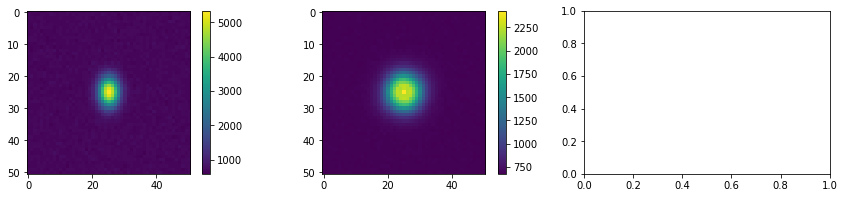

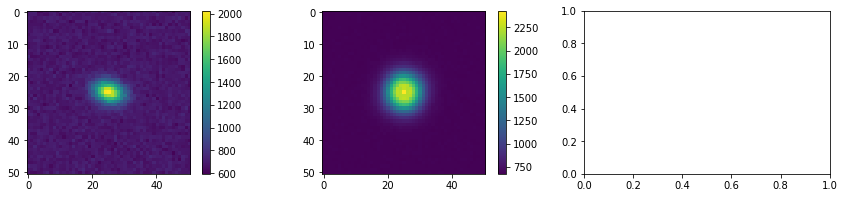

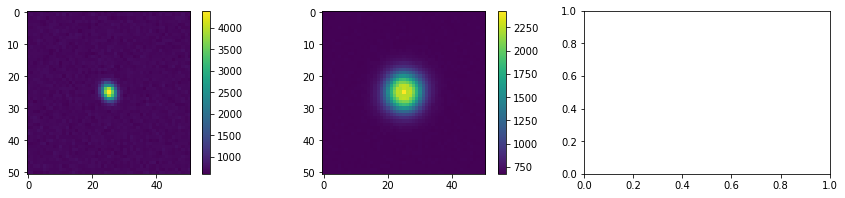

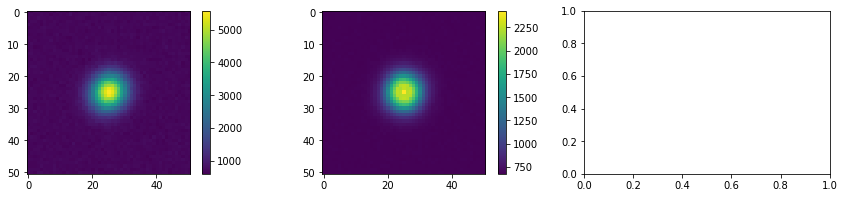

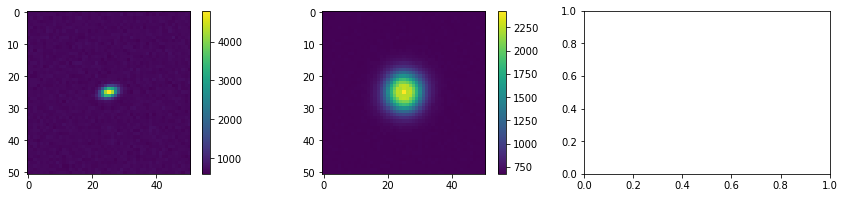

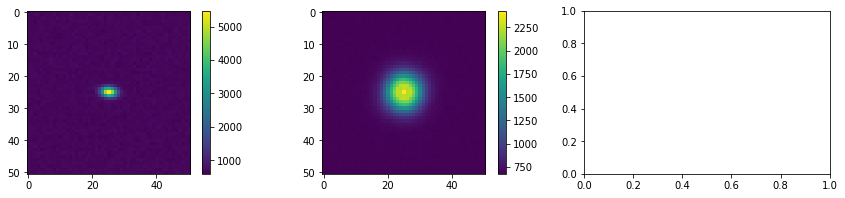

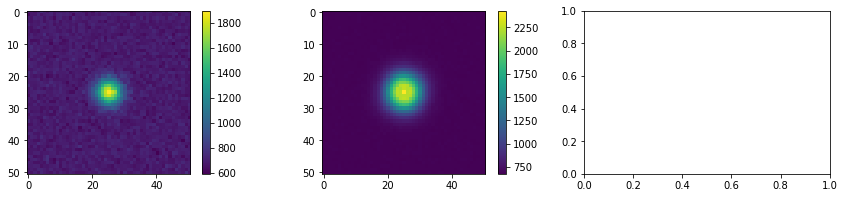

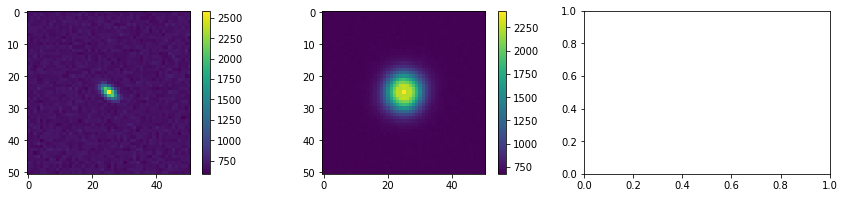

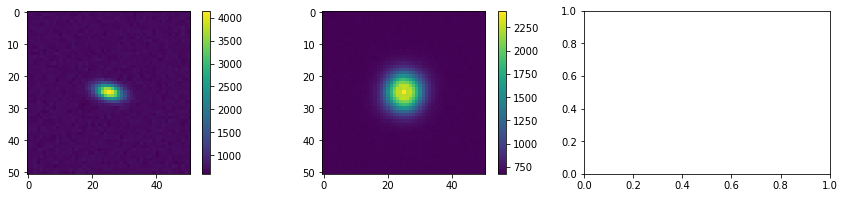

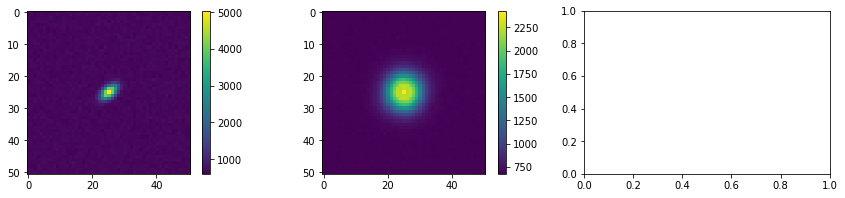

In [9]:
for images in data_loader:
    break

recon_mean = galaxy_vae(images)[0]

for i in range(10): 
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

    
    # plot image
    im1 = ax1.imshow(images[i].cpu())
    fig.colorbar(im1, ax=ax1)
    
    im2 = ax2.imshow(recon_mean[i].detach().cpu())
    fig.colorbar(im2, ax=ax2)
    
#     im3 = ax3.imshow(var * 0.)
#     fig.colorbar(im3, ax=ax3)
    
    
#     diff = (obs - recon) # / torch.sqrt(var) 
#     vmax = diff.abs().max()
#     im4 = ax4.imshow(diff, vmax = vmax, vmin = -vmax, cmap = plt.get_cmap('bwr'))
#     fig.colorbar(im4, ax = ax4)
    
#     fig.tight_layout()